# SKIP GRAM TECHNIQUE OF WORD EMBEDDINGS 

In [1]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [5]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
skipgram = Word2Vec(sentences, size = 20, window=3, min_count=1, sg=1)

In [11]:
print(skipgram['love'])

[ 0.01631922  0.01980026 -0.01094356  0.02237906 -0.01864366  0.00650193
 -0.02463605  0.00018709  0.02249522  0.00690468 -0.01976094  0.00459866
  0.00393321 -0.01779214 -0.00137465  0.01124399  0.01796717 -0.02322656
 -0.0050192  -0.01188708]


<ipython-input-11-6d28080ea719>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(skipgram['love'])


In [12]:
skipgram.save('skipgram.bin')

In [13]:
skipgram = Word2Vec.load('skipgram.bin')

In [14]:
skipgram

In [15]:
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<ipython-input-15-a333293ce2ea>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = skipgram[skipgram.wv.vocab]


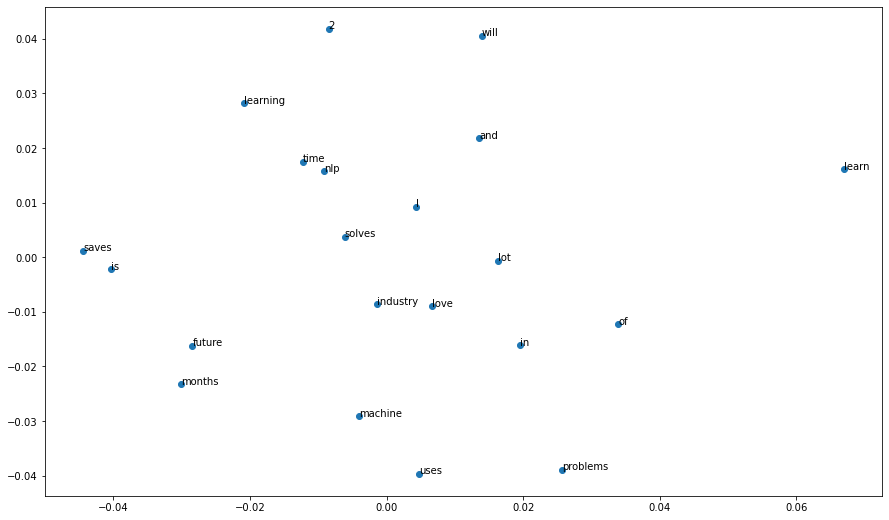

In [18]:
plt.figure(figsize=(15,9))
plt.scatter(result[:,0], result[:,1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# CONTINUOUS BAG OF WORDS

In [19]:
cbow = Word2Vec(sentences, size=50, sg=1,window=3,min_count=1)

In [20]:
print(cbow)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [21]:
print(cbow['nlp'])

[-1.6674284e-03  2.4643815e-03 -5.8362926e-03  5.4506687e-03
  8.3714109e-03 -1.0050485e-03  5.0791679e-03 -2.9533398e-05
  7.2011082e-03  2.1174221e-04 -7.3674750e-03  4.9917283e-03
  7.8171883e-03 -1.5196659e-03 -7.5488188e-03 -5.6516831e-03
 -9.7939577e-03  7.4345164e-04  5.0675818e-03  4.9586967e-03
 -7.6805088e-03 -1.4450989e-03 -2.4516967e-03  7.3007485e-03
 -8.6226007e-03  6.6557131e-03 -1.6635929e-03 -6.3803573e-03
  9.5284013e-03 -9.9726599e-03 -7.6891934e-03 -5.6594131e-03
 -7.5072278e-03 -7.0431246e-03 -9.8441560e-03 -5.3270380e-03
  7.1435212e-03  5.8608940e-03 -8.7211700e-03 -7.6629366e-03
 -1.1690822e-03  6.6513275e-03 -5.2793962e-03  4.9660052e-03
  8.4085716e-03 -6.1407657e-03 -6.2736403e-03  2.6437256e-03
  4.3164045e-03  1.4886592e-03]


<ipython-input-21-1aa55d1be8b3>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(cbow['nlp'])


In [22]:
cbow.save('cbow.bin')

In [23]:
cbow = Word2Vec.load('cbow.bin')

In [24]:
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<ipython-input-24-fb8ffaa725df>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = cbow[cbow.wv.vocab]


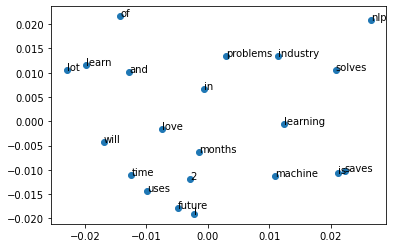

In [25]:
plt.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [31]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [32]:
print(model.similarity('this','is'))

0.40797037


In [33]:
print (model.similarity('post', 'book'))

0.05720439


In [35]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

C:\Users\sarim\anaconda3\envs\myenv\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [39]:
model.most_similar(positive=['queen', 'king'], negative=['women'])

[('monarch', 0.5956358313560486),
 ('kings', 0.5700516104698181),
 ('prince', 0.5437701940536499),
 ('princess', 0.5197287797927856),
 ('royal', 0.5041717290878296),
 ('ruler', 0.4921566843986511),
 ('crown_prince', 0.4911947548389435),
 ('Eugene_Ionesco_absurdist_comedy', 0.4789333939552307),
 ('queens', 0.47192883491516113),
 ('princes', 0.47129952907562256)]

<ipython-input-43-a594f9e47393>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  words = list(model.wv.vocab)


IndexError: index 21 is out of bounds for axis 0 with size 21

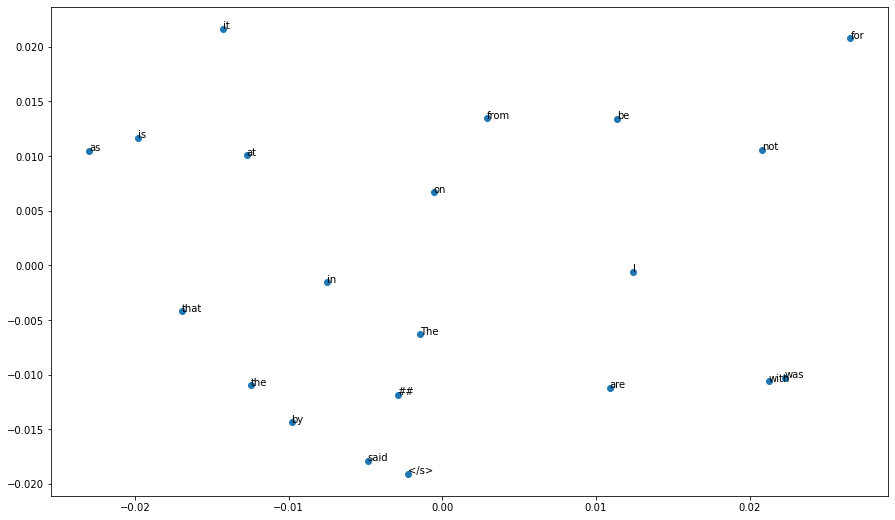

In [43]:
plt.figure(figsize=(15,9))
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [44]:
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [45]:
fast = FastText(sentences,size=20, window=1, min_count=1,workers=5, min_n=1, max_n=2)

In [46]:
print(fast['nlp'])

[ 0.00145743 -0.006103   -0.01052622 -0.00311103 -0.00338806  0.02404632
 -0.00938473  0.00470077 -0.00037666 -0.00319065 -0.01831873 -0.00377998
 -0.00250528 -0.0063827   0.00522308  0.01522697  0.02165839 -0.00143036
 -0.00438009  0.00490688]


<ipython-input-46-9660a93a0b3c>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(fast['nlp'])


In [47]:
print(fast['deep'])

[-0.00551768 -0.00133838 -0.00853625  0.00362653 -0.0089807   0.022962
 -0.00074487  0.00164554 -0.02352585 -0.00652109 -0.0067275   0.01114251
  0.00089385 -0.02170741 -0.00463046 -0.00650469  0.00407186  0.01711867
 -0.00594492 -0.01274448]


<ipython-input-47-23abf1de9426>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(fast['deep'])


In [50]:
fast.save('fast.bin')

In [51]:
fast = Word2Vec.load('fast.bin')

In [52]:
X = fast[fast.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<ipython-input-52-99cfd4e447a0>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = fast[fast.wv.vocab]


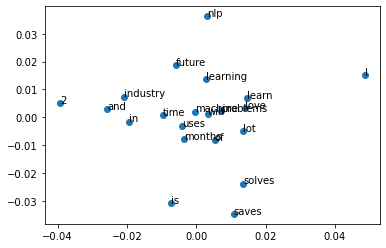

In [53]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()